<a href="https://colab.research.google.com/github/whtan88/RandomDataAnalyst_DataAnalysis/blob/main/Basic_EDA_and_ML_Prediction_of_Kaggle_Spaceship_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

Kaggle Competition page: https://www.kaggle.com/competitions/spaceship-titanic/overview

# Objective of this Notebook

The objective is to provide a simple overview of how to do Exploratory Data Analysis (EDA) and also to run and compare the performance metric of various machine learning algorithms before choosing 1 to submit.

# Downloading Kaggle Dataset

Below is a set of code which is used to connect via Kaggle API to download the dataset to be used.

Reference can be found from discussion thread here: https://www.kaggle.com/discussions/general/74235

In [ ]:
# Accessing Kaggle API to download the dataset

from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

dataset = 'spaceship-titanic'
!kaggle competitions download -c $dataset

zip_file = f"{dataset}.zip"
destination_dir = f"/content/{dataset}"

if not os.path.exists(zip_file):
    print(f"Error: {zip_file} not found.")
else:
    !unzip -q $zip_file -d $destination_dir
    !rm $zip_file

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 99.9MB/s]
replace /content/spaceship-titanic/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Importing Libraries

Importing the necessary libraries for running the codes here. We will be running most of the Machine Learning algos from the scikitlearn library, with a few from tensorflow decision tree library. Note that this might take several minutes to run.

In [ ]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

!pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf

# Data File MetaData

Once the libraries are imported, we will then read the train data csv file and inspect a few records. Below is an excerpt of the file's metadata taken from the kaggle webpage for ease of reference.

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
<br>HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
<br>CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
<br>Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
<br>Destination - The planet the passenger will be debarking to.
<br>Age - The age of the passenger.
<br>VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
<br>Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [ ]:
# Load and read the training data
df = pd.read_csv("/content/spaceship-titanic/train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Exploratory Data Analysis (EDA)

Before we train the model, we need to have a deeper dive and analysis of the data to better understand what we are dealing with. This is where Exploratory Data Analysis (EDA) comes in. We can do it in several ways to insepct it visually through graphical displays or through numerical statistical analysis.

I will attempt to demonstrate a few ways below. There is no right or wrong way of doing it, and doing it differently may yield different results for different models.

I will start off first by checking for any null values in the dataset. It seems that there are plenty of them scattered throughout the dataset. We are dealing with unclean data here and we would need to address this later.

In [ ]:
# Check if there are any missing values in the dataset
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
# Inspect a few rows with missing values
df[df.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


Below, we can inspect the data types of the columns. We need to take note of this as we may need to change the datatype subsequently in order to for the training model to ingest the data properly.

In [ ]:
# Inspecting the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Firstly, I will split the column Cabin into 3 separate columns, Deck, the number and Side, as these information are contained within the same column. As I think that it might be helpful to use the separate data, thus the splitting. I will check the number of unique values, the count of each value, and fill null values with the value with the highest count. For the column Deck, since there is a high number of them, I will use the label encoder instead of one hot encoding to reduce the number of independent variables.

In [ ]:
# Splitting the column Cabin into 3 separate columns for inspection
df[['Deck','No','Side']] = df['Cabin'].str.split('/',expand=True)

# Inspecting the values populated in the column 'deck'
print(df['Deck'].nunique())
print(df['Deck'].unique())
print(df['Deck'].value_counts())
# Fillng NA values for the column 'Deck'
df['Deck'].fillna('F', inplace = True)

# Performing a label encoder on the column 'deck'
le = LabelEncoder()
le.fit(df['Deck'].unique())
df['Deck'] = le.transform(df['Deck'])
print(df['Deck'].unique())

# Inspecting the values populated in the column 'No'
print(df['No'].nunique())
print(df['No'].unique())
print(df['No'].value_counts())
# Filling NA values and converting the new column 'No' to a suitable format
df['No'].fillna(2000, inplace = True)
df['No'] = pd.to_numeric(df['No'])

# Inspecting the values populated in the column 'Side'
print(df['Side'].nunique())
print(df['Side'].unique())
print(df['Side'].value_counts())
# Filling NA and converting the new column 'Side' to a suitable format
df['Side'].fillna('S', inplace = True)
df['Side']= df['Side'].map({'S': 1, 'P': 0}).astype(int)

8
['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64
[1 5 0 6 4 3 2 7]
1817
['0' '1' '2' ... '1892' '1893' '1894']
No
82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: count, Length: 1817, dtype: int64
2
['P' 'S' nan]
Side
S    4288
P    4206
Name: count, dtype: int64


Now that we have split the column Cabin into 3 columns, we can do a graphical look at the distribution of transported people staying at different cabin numbers and it appears to be quite even.

<Axes: xlabel='No', ylabel='Count'>

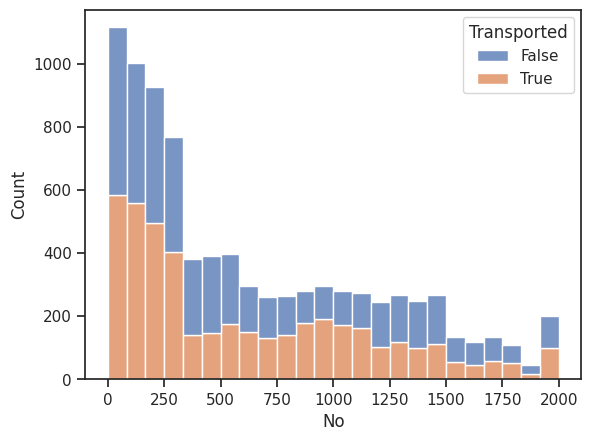

In [ ]:
# Histogram plot of distribution of cabin number
sns.set_theme(style="ticks")

sns.histplot(df, x="No", hue="Transported", multiple="stack")

Next with the column HomePlanet,  I will check the number of unique values, the count of each value, and fill null values with the value with the highest count. We will drop a column to reduce the number of independent variables and to prevent multicollinearity as well.

In [ ]:
# Inspecting the values populated in the column 'HomePlanet'
print(df['HomePlanet'].nunique())
print(df['HomePlanet'].unique())
print(df['HomePlanet'].value_counts())

df = pd.get_dummies(df, columns=['HomePlanet'], drop_first=True)
df.head()

3
['Europa' 'Earth' 'Mars' nan]
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,No,Side,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,True,False
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5,0,1,False,False
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,1,True,False
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,1,True,False
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5,1,1,False,False


Similarly with the column Destination as well. We will drop a column to reduce the number of independent variables and to prevent multicollinearity as well.

In [ ]:
# Inspecting the values populated in the column 'Destination'
print(df['Destination'].nunique())
print(df['Destination'].unique())
print(df['Destination'].value_counts())

df = pd.get_dummies(df, columns=['Destination'], drop_first=True)
df.head()

3
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,No,Side,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,True,False,False,True
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5,0,1,False,False,False,True
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,1,True,False,False,True
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,1,True,False,False,True
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5,1,1,False,False,False,True


In [ ]:
# Filling NA values of the remaining columns with an appropriate value
df['CryoSleep'].fillna(False, inplace = True)
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['VIP'].fillna(False, inplace = True)

Amenity_list = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for i in Amenity_list:
  df[i].fillna(0, inplace = True)

Once the NA values are filled, we will now check the modified dataset for any other NA values. Great that all the columns do not have null values except columns Cabin and Name. It shouldn't be a problem as we will not be using those columns for data input.

In [ ]:
# Check again if there are any missing values in the dataset
df.isnull().sum()

PassengerId                    0
CryoSleep                      0
Cabin                        199
Age                            0
VIP                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Name                         200
Transported                    0
Deck                           0
No                             0
Side                           0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
dtype: int64

We can have a look at the distribution of the numerical columns as well.

In [ ]:
# Inspecting the numerical columns of the dataset
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,No,Side
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,220.009318,448.434027,169.572300,304.588865,298.261820,4.321293,632.408029,0.516162
std,14.339054,660.519050,1595.790627,598.007164,1125.562559,1134.126417,1.760826,547.569777,0.499767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,173.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,448.000000,1.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000,6.000000,1040.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,7.000000,2000.000000,1.000000


We will also check if the target dependent variable has a balance distribution. The numbers are fairly balance on both sides so it should be fine. We don't need to do any balancing adjustments for it.

In [ ]:
# Inspect the distribution of the dependent variable
df['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

We will also check for any correlation between independent variables. From the table below, we can see that there are no independent variables with strong correlation.

In [ ]:
# Inspect the correlation between the various independent variables
df.drop(['Cabin','Name'],axis=1).corr()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,No,Side,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
PassengerId,1.000000,-0.006883,-0.009347,0.013608,0.000375,-0.009200,0.017795,-0.005198,0.015945,0.021491,-0.003836,0.609927,-0.010562,0.004946,-0.008802,0.013533,-0.008015
CryoSleep,-0.006883,1.000000,-0.070736,-0.078281,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,0.460132,0.018806,-0.024905,0.023858,0.093395,0.032715,0.087764,-0.103213
Age,-0.009347,-0.070736,1.000000,0.091574,0.068425,0.127343,0.032846,0.121071,0.099551,-0.074249,-0.241692,-0.118414,0.011758,0.217444,0.016081,-0.028247,-0.001036
VIP,0.013608,-0.078281,0.091574,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261,-0.178205,-0.086796,-0.008798,0.147008,0.043523,-0.000592,-0.035309
RoomService,0.000375,-0.244089,0.068425,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124,-0.024327,0.002588,-0.006991,-0.066635,0.245222,-0.063354,0.060684
FoodCourt,-0.009200,-0.205928,0.127343,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583,-0.318038,-0.166208,0.019682,0.365102,-0.124755,-0.065400,-0.073520
ShoppingMall,0.017795,-0.207798,0.032846,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391,-0.033038,-0.002007,-0.020940,-0.021155,0.111654,-0.031245,0.033063
Spa,-0.005198,-0.198307,0.121071,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545,-0.219035,-0.107003,0.005700,0.266103,-0.087989,-0.053303,-0.034497
VRDeck,0.015945,-0.192721,0.099551,0.123061,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874,-0.253101,-0.128786,-0.009089,0.282556,-0.111863,-0.044861,-0.047011
Transported,0.021491,0.460132,-0.074249,-0.037261,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000,-0.114941,-0.041321,0.101397,0.176916,0.019544,0.000092,-0.094700


# Training Machine Learning Algorithms

Here, we will start to train the machine learning algorithms. We will start by dropping some columns for training data. Then, for the numerical cardinal data, we will apply a standard scaler to it to normalise the data.

Next, we will split the data between training and validation set to get a sense of the model accuracy and performance.

Then, we will iterate through a list of models, fitting the data to it and saving all the training and validation scores to a summary dataframe.

In [ ]:
# Dropping columns which are not needed
x_train = df.drop(['Transported','Cabin','Name'],axis=1)

# Scaling the cardinal data
scaled_column_list = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i in scaled_column_list:
  x_train[[i]] = StandardScaler().fit_transform(x_train[[i]])
y_train = df['Transported']

# Splitting the data bewteen training and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

# Preparing the lists
model_list = [LogisticRegression(),GaussianNB(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),BaggingClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
model_name = []
train_score = []
val_score = []

# Training the models and recording the results
for i in model_list:
  mdl = i
  mdl.fit(x_train,y_train)
  model_name.append(str(i)[:-2])
  train_score.append(round(mdl.score(x_train,y_train),4))
  val_score.append(round(mdl.score(x_val,y_val),4))

# Saving the results to a score summary dataframe
df_score = pd.DataFrame(list(zip(model_name, train_score,val_score)), columns=['Model Name', 'Train Score', 'Validation Score'])

Next, we will train the tensorflow decision tree models. We will have to prepare the data by transforming it into tf dataset, which can then be ingested by the tensorflow models for training.

In [ ]:
# Including the target column to prepare for tf dataset generation
tf_df_train = x_train.assign(Transported=y_train)
tf_df_val = x_val.assign(Transported=y_val)

# Changing the data type to an appropriate format which can be read by tf dataset
col_bool_int = ["CryoSleep","VIP","HomePlanet_Europa","HomePlanet_Mars","Destination_PSO J318.5-22","Destination_TRAPPIST-1e","Transported"]
for i in col_bool_int:
  tf_df_train[i] = tf_df_train[i].astype(int)
  tf_df_val[i] = tf_df_val[i].astype(int)

# Transforming the dataframe data to tf dataset for tf model ingestion
tf_df_train = tfdf.keras.pd_dataframe_to_tf_dataset(tf_df_train, label="Transported")
tf_df_val = tfdf.keras.pd_dataframe_to_tf_dataset(tf_df_val, label="Transported")

# Training the models and recording the results
tf_model_list = [tfdf.keras.RandomForestModel(), tfdf.keras.GradientBoostedTreesModel(), tfdf.keras.CartModel()]
j = 1
for i in tf_model_list:
  model = i
  model.fit(tf_df_train)
  model.compile(metrics=["accuracy"])
  model_name = "tf model" + str(j)
  eval_train = model.evaluate(tf_df_train, return_dict=True)
  eval_val = model.evaluate(tf_df_val, return_dict=True)
  j +=1
  df_score.loc[len(df_score.index)] = [model_name, eval_train['accuracy'], eval_val['accuracy']]

Use /tmp/tmp9i1gq6pw as temporary training directory
Use /tmp/tmp_jabl4hb as temporary training directory
Use /tmp/tmp_adfsej9 as temporary training directory
Reading training dataset...


Training dataset read in 0:00:01.278747. Found 6519 examples.
Training model...
Model trained in 0:00:08.065489
Compiling model...
Model compiled.


3/3 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - accuracy: 0.7898
Reading training dataset...
Training dataset read in 0:00:00.418304. Found 6519 examples.
Training model...
Model trained in 0:00:02.720328
Compiling model...
Model compiled.
3/3 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 0.7935
Reading training dataset...
Training dataset read in 0:00:00.574471. Found 6519 examples.
Training model...
Model trained in 0:00:00.050606
Compiling model...
Model compiled.
3/3 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.7815


# Model Results

Once all the models have completed training, we can output the score to inspect. It seems that the validation scores are pretty close, but the model with the best results seem to be the GradientBoostingClassifier and the training and validation score are not too far off. So we will generate a submission file based on this model.

In [ ]:
df_score

,Model Name,Train Score,Validation Score
0,LogisticRegression,0.529800,0.544600
1,GaussianNB,0.551000,0.571800
2,KNeighborsClassifier,0.701500,0.537300
3,SVC,0.540300,0.538200
4,DecisionTreeClassifier,1.000000,0.732800
5,RandomForestClassifier,1.000000,0.788400
6,BaggingClassifier,0.983600,0.772800
7,AdaBoostClassifier,0.802000,0.791600
8,GradientBoostingClassifier,0.828800,0.796700
9,tf model1,0.925756,0.789788


We will inspect the test and submission files to check out the format.

In [ ]:
# Inspecting the sample submission file
df_sub = pd.read_csv("/content/spaceship-titanic/sample_submission.csv")
df_sub.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [ ]:
# Inspecting the test data file
df_test = pd.read_csv("/content/spaceship-titanic/test.csv")
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Preprocessing the test data

We will apply the same preprocessing data steps as have done for the training data to ensure consistency in data treatment between training and test data.

In [ ]:
# Splitting the column Cabin into 3 separate columns as data inputs
df_test[['Deck','No','Side']] = df_test['Cabin'].str.split('/',expand=True)
df_test['Deck'].fillna('F', inplace = True)

# Performing a label encoder on the column 'deck'
le = LabelEncoder()
le.fit(df_test['Deck'].unique())
df_test['Deck'] = le.transform(df_test['Deck'])

# Filling NA values and converting the new column 'No' to a suitable format
df_test['No'].fillna(2000, inplace = True)
df_test['No'] = pd.to_numeric(df['No'])

# Filling NA values and converting the new column 'Side' to a suitable format
df_test['Side'].fillna('S', inplace = True)
df_test['Side']= df_test['Side'].map({'S': 1, 'P': 0}).astype(int)

# Performing one hot encoding on the HomePlanet and Destination columns
df_test = pd.get_dummies(df_test, columns=['HomePlanet'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Destination'], drop_first=True)

# Filling the columns with NA values to an appropriate value
df_test['CryoSleep'].fillna(False, inplace = True)
df_test['Age'].fillna(df['Age'].mean(), inplace = True)
df_test['VIP'].fillna(False, inplace = True)

Amenity_list = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for i in Amenity_list:
  df_test[i].fillna(0, inplace = True)

# Generate submission file

Similar to what we have done, we will drop the columns which are not needed and apply standard scaling to the cardinal data. We will then fit and train the model, and output a list of predicted results and save the results in csv file with the expected submission format.

I have included 2 blocks of code below, the first is for using a ScikitLearn model to generate a submission file and the second is for using a Tensorflow model to generate a submission file.

In [ ]:
# Using the best Scikitlearn model to produce the submission file

# Dropping columns which are not needed
x_test = df_test.drop(['Cabin','Name'],axis=1)
# Scaling the cardinal data
for i in scaled_column_list:
  x_test[[i]] = StandardScaler().fit_transform(x_test[[i]])

# Training the model and predicting
model = GradientBoostingClassifier()
model.fit(x_train,y_train)
transported_pred = model.predict(x_test)

# Storing the output in a submission format and saving it to csv
df_score = pd.DataFrame(list(zip(df_test['PassengerId'], transported_pred)), columns=['PassengerId', 'Transported'])
df_score.head()

df_score.to_csv('Submission.csv', index=False)

In [ ]:
# Using the best Tensorflow model to produce the submission file

# Dropping columns which are not needed
x_test = df_test.drop(['Cabin','Name'],axis=1)
# Inserting the target column for tf dataset ingestion
x_test['Transported'] = 0

# Scaling the cardinal data
for i in scaled_column_list:
  x_test[[i]] = StandardScaler().fit_transform(x_test[[i]])

# Changing the data type to an appropriate format which can be read by tf dataset
for i in col_bool_int:
  x_test[i] = x_test[i].astype(int)

# Transforming the dataframe data to tf dataset for tf model ingestion
x_test = tfdf.keras.pd_dataframe_to_tf_dataset(x_test)

# Training the model and predicting
model = tfdf.keras.GradientBoostedTreesModel()
model.fit(tf_df_train)
model.compile(metrics=["accuracy"])
s = model.predict(x_test)

# Storing the output in a submission format and saving it to csv
# Since the output is in probabilities, we define a threshold to convert it to true false boolean value
transform = lambda num: num >= 0.5
transported_pred = [transform(num) for num in s.flatten()]

df_score = pd.DataFrame(list(zip(df_test['PassengerId'], transported_pred)), columns=['PassengerId', 'Transported'])
df_score.head()

df_score.to_csv('Submission.csv', index=False)

Use /tmp/tmp0ddfkixa as temporary training directory
Reading training dataset...


Training dataset read in 0:00:01.534055. Found 6519 examples.
Training model...
Model trained in 0:00:06.237438
Compiling model...


Model compiled.


5/5 [==============================] - 0s 35ms/step


array([[0.5599996 ],
       [0.03333334],
       [0.9833325 ],
       ...,
       [0.9699992 ],
       [0.7933327 ],
       [0.6299995 ]], dtype=float32)